# Portfolio Returns

In [2]:
# Import dependencies
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
%matplotlib inline

In [3]:
# Pull in portfolio data from CSVs
erii_returns = Path('erii_historical.csv')
tpr_returns = Path('tpr_historical.csv')
mrk_returns = Path('mrk_historical.csv')
low_returns = Path('low_historical.csv')
sp500_returns = Path('sp500_historical.csv')

In [22]:
# Read CSVs and Create DataFrames
erii_dataframe = pd.read_csv(erii_returns, infer_datetime_format=True, parse_dates=True)
tpr_dataframe = pd.read_csv(tpr_returns, infer_datetime_format=True, parse_dates=True)
mrk_dataframe = pd.read_csv(mrk_returns, infer_datetime_format=True, parse_dates=True)
low_dataframe = pd.read_csv(low_returns, infer_datetime_format=True, parse_dates=True)
sp500_dataframe = pd.read_csv(sp500_returns, infer_datetime_format=True, parse_dates=True)
sp500_dataframe

,Date,Close
0,10/1/2019 16:00:00,2940.25
1,10/2/2019 16:00:00,2887.61
2,10/3/2019 16:00:00,2910.63
3,10/4/2019 16:00:00,2952.01
4,10/7/2019 16:00:00,2938.79
...,...,...
248,9/24/2020 16:00:00,3246.59
249,9/25/2020 16:00:00,3298.46
250,9/28/2020 16:00:00,3351.60
251,9/29/2020 16:00:00,3335.47


In [30]:
# Dropping Date column so that new data lines up with Whale Data as Whale Data (2015 - April 2019) does not line up with Custom Portfolio Data (October 2019 - October 2020)
erii_dataframe = erii_dataframe.drop(['Date'], axis=1)
tpr_dataframe = tpr_dataframe.drop(['Date'], axis=1)
mrk_dataframe = mrk_dataframe.drop(['Date'], axis=1)
low_dataframe = low_dataframe.drop(['Date'], axis=1)
sp500_dataframe = sp500_dataframe.drop(['Date'], axis=1)

In [32]:
# Calculate Returns For Each Stock
erii_daily_return = erii_dataframe.pct_change()
tpr_daily_return = tpr_dataframe.pct_change()
mrk_daily_return = mrk_dataframe.pct_change()
low_daily_return = low_dataframe.pct_change()
sp500_daily_return = sp500_dataframe.pct_change()

print(erii_daily_return)
print(tpr_daily_return)
print(mrk_daily_return)
print(low_daily_return)
print(sp500_daily_return)

        Close
0         NaN
1    0.008811
2   -0.007642
3   -0.003300
4   -0.012141
..        ...
248  0.011278
249  0.000000
250  0.021066
251 -0.008495
252  0.003672

[253 rows x 1 columns]
        Close
0         NaN
1   -0.033594
2    0.021423
3    0.008706
4   -0.012162
..        ...
248 -0.015069
249  0.001224
250  0.013447
251 -0.065139
252  0.008387

[253 rows x 1 columns]
        Close
0         NaN
1   -0.023801
2    0.013722
3    0.027314
4   -0.007176
..        ...
248  0.006293
249 -0.002646
250 -0.002050
251 -0.010391
252  0.012821

[253 rows x 1 columns]
        Close
0         NaN
1   -0.028944
2    0.000188
3    0.009871
4    0.007540
..        ...
248 -0.000567
249  0.006498
250  0.019054
251 -0.002030
252  0.022187

[253 rows x 1 columns]
        Close
0         NaN
1   -0.017903
2    0.007972
3    0.014217
4   -0.004478
..        ...
248  0.002987
249  0.015977
250  0.016111
251 -0.004813
252  0.008254

[253 rows x 1 columns]


In [33]:
# Concatenate DataFrames into a single DataFrame. Excludes S&P 500 as it is an index

combined_dataframe = pd.concat([erii_dataframe, tpr_dataframe, mrk_dataframe, low_dataframe], axis='columns', join='inner')
combined_dataframe.columns = ['ERII','TPR','MRK','LOW']

# Calculate weighted returns for portfolio with equal amount of each stock. Excludes S&P 500 as it is an index
weights = [0.25,0.25,0.25,0.25]
combined_portfolio_returns = combined_dataframe.dot(weights)

# Make the weighted returns into a new DataFrame
combined_portfolio_returns = pd.DataFrame(combined_portfolio_returns)

#Change the column name
combined_portfolio_returns.columns = ['Project Cornerstone']

combined_portfolio_returns

,Project Cornerstone
0,56.9525
1,55.4675
2,55.8675
3,56.7425
4,56.6875
...,...
248,66.5200
249,66.7275
250,67.5425
251,66.9575


In [34]:
# Determine Daily return based on the new DataFrame
combined_portfolio_returns = combined_portfolio_returns.pct_change()
combined_portfolio_returns

,Project Cornerstone
0,NaN
1,-0.026074
2,0.007211
3,0.015662
4,-0.000969
...,...
248,0.001016
249,0.003119
250,0.012214
251,-0.008661


In [35]:
# Bring in Whale Returns to compare
whale_returns = Path('whale_portfolio.csv')
whale_dataframe = pd.read_csv(whale_returns, infer_datetime_format=True, parse_dates=True)
whale_dataframe

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
0,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
1,2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2,2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
3,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
4,2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...,...
1038,2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
1039,2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
1040,2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579
1041,2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012


In [39]:
# Remove Date column per comments above as dates don't line up but data does
compiled_dataframe = pd.concat([whale_dataframe, combined_portfolio_returns], axis='columns', join='inner')
compiled_dataframe.drop(['Date'], axis=1, inplace=True)
compiled_dataframe

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Project Cornerstone
0,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,NaN
1,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,-0.026074
2,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,0.007211
3,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,0.015662
4,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,-0.000969
...,...,...,...,...,...,...,...,...
248,0.008691,0.014958,0.022396,-0.011997,-0.005957,0.006605,0.011348,0.001016
249,0.003480,0.002174,0.026421,0.008685,0.005786,0.005180,-0.001870,0.003119
250,-0.007371,-0.015972,-0.007554,-0.001977,0.004232,-0.000851,-0.008121,0.012214
251,0.016906,0.009735,0.012634,0.030164,-0.005267,0.017115,0.023869,-0.008661


In [40]:
# Drop Null values
compiled_dataframe.dropna(inplace=True)
compiled_dataframe

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Project Cornerstone
1,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,-0.026074
2,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,0.007211
3,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,0.015662
4,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,-0.000969
5,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.016961,-0.014686
...,...,...,...,...,...,...,...,...
248,0.008691,0.014958,0.022396,-0.011997,-0.005957,0.006605,0.011348,0.001016
249,0.003480,0.002174,0.026421,0.008685,0.005786,0.005180,-0.001870,0.003119
250,-0.007371,-0.015972,-0.007554,-0.001977,0.004232,-0.000851,-0.008121,0.012214
251,0.016906,0.009735,0.012634,0.030164,-0.005267,0.017115,0.023869,-0.008661


<AxesSubplot:>

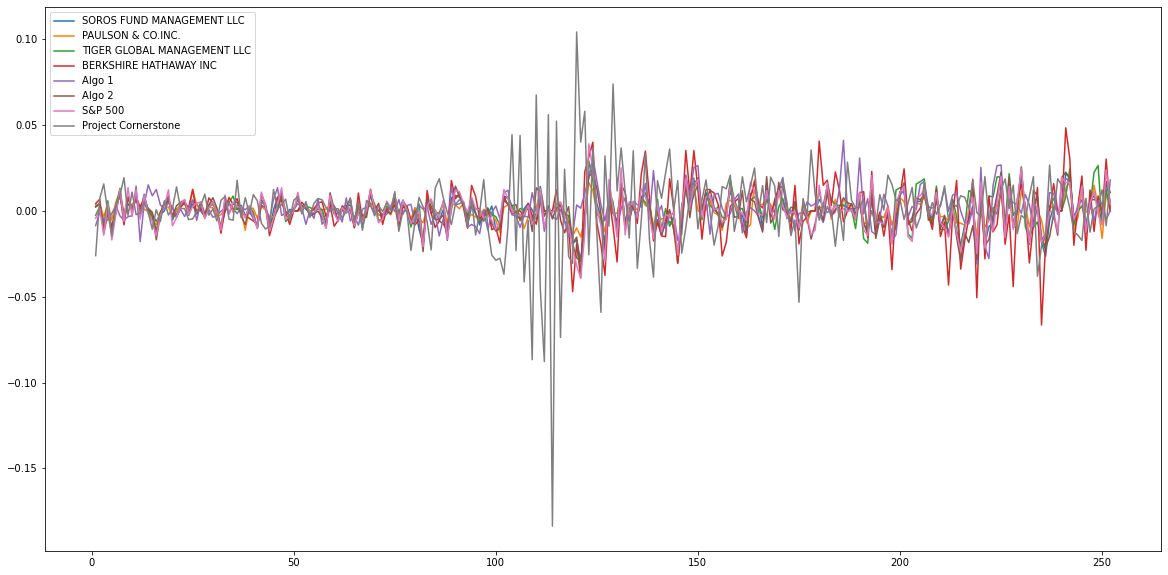

In [38]:
# How did Project Cornerstone do against the rest of the portfolios?
compiled_dataframe.plot(figsize=(20,10))

### Analysis

Project Cornerstone is made up of a consumer/home goods company(Lowe's), a Luxury/Lifestyle company (Tapestry), a pharmaceutical company (Merck), and an energy company (ERII). This portfolio went through a period of massive volatility during the coronavirus onset (March-April 2020) which is why we see the large spikes and valleys. 